In [1]:
# necessary packages
import tensorflow as tf
import pickle

import pandas as pd 
import numpy as np

import os
import sys

import warnings
warnings.filterwarnings('ignore')

from skimage.io import imread
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd '/content/drive/MyDrive/project/'

/content/drive/MyDrive/project


In [4]:
#Reading images from the multimodal datset that are extracted from "Url's" using image_downloader.py

import cv2
import os
import numpy as np

def load_images_from_folder(folder):
    images = []
    image_name = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))

        if img is not None:
            img=cv2.resize(img,(224,224),interpolation=cv2.INTER_AREA)
            images.append(img)
            filename = filename.replace('.jpg', '')
            image_name.append(filename)
    return images, image_name

images_lst, image_names = load_images_from_folder('/content/drive/MyDrive/project/images_train')

In [5]:
print("shape of the original data",np.array(images_lst).shape)

shape of the original data (5082, 224, 224, 3)


#Data
Loading the multimodal train dataframe to match the text set as few url's are working to download imgaes with lead to skip such data records. So, it is importtant to merge the text and image data to create a consistant dataset with appropriate images and their respective labels.

In [6]:
# Merging text and image data to create new dataframe
train_data = pd.read_pickle('/content/drive/MyDrive/project/multimodal_text_train')
train_data

,id,clean_title,2_way_label
0,awxhir,my walgreens offbrand mucinex was engraved wit...,1
1,98pbid,this concerned sink with a tiny hat,0
2,6f2cy5,hackers leak emails from uae ambassador to us,1
3,4xypkv,puppy taking in the view,1
4,8gnet9,i found a face in my sheet music too,0
...,...,...,...
5232,83x4h8,captured taliban soldier taken to an undisclos...,0
5233,b2e0iz,jacob collier djesse vol reimagined as a class...,0
5234,d9ag36x,gave it a shot,0
5235,6z63f9,ready to smoke up got my grinder and a few nugs,0


In [7]:
import pandas as pd

data = pd.DataFrame ({ 'images': images_lst, 'id': image_names}, columns = ['images','id'])

from operator import index

data = pd.merge(data, train_data , on='id')
data

,images,id,clean_title,2_way_label
0,"[[[18, 24, 19], [19, 24, 22], [25, 30, 29], [3...",cds1cls,body slam,0
1,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",cob0dcf,im not really good at this,0
2,"[[[254, 220, 134], [255, 223, 140], [255, 222,...",csl85z,bureau of prisons chief removed in wake of jef...,1
3,"[[[196, 196, 196], [196, 196, 196], [196, 196,...",dcqujt,nasa news an incredible black hole appeared on...,0
4,"[[[216, 197, 159], [209, 190, 150], [216, 198,...",b0gc3d,this loadbearing piece of wood eaten by termit...,1
...,...,...,...,...
5077,"[[[105, 114, 128], [113, 122, 136], [113, 122,...",c7dobn,the reinforcement on these identical pieces of...,1
5078,"[[[13, 5, 6], [15, 6, 7], [15, 7, 8], [14, 7, ...",crczvy,at halftime of sdsus basketball game they auct...,1
5079,"[[[117, 116, 208], [103, 103, 201], [106, 107,...",byh5dw,revolution syria,0
5080,"[[[255, 255, 255], [255, 254, 254], [255, 255,...",9fb69a,this spider on my back porch disguises itself ...,1


In [8]:
# splitting dataframe by row index
df_test= data.iloc[:945,:]
df_train = data.iloc[945:,:]

0    2470
1    1667
Name: 2_way_label, dtype: int64


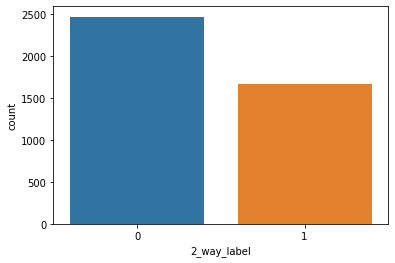

In [10]:
import seaborn as sns 

# Target distribution for training dataset

print(df_train['2_way_label'].value_counts())

# count plot on single categorical variable
sns.countplot(x ='2_way_label', data = df_train)

In [11]:
df_train= df_train[['images','2_way_label']]
df_test = df_test[['images','2_way_label']]
df_train

,images,2_way_label
945,"[[[9, 48, 119], [0, 40, 109], [5, 52, 117], [3...",1
946,"[[[14, 116, 84], [31, 132, 102], [48, 146, 119...",1
947,"[[[251, 253, 253], [251, 253, 253], [251, 253,...",0
948,"[[[155, 180, 3], [156, 190, 29], [155, 194, 94...",0
949,"[[[57, 111, 72], [62, 113, 75], [68, 118, 80],...",0
...,...,...
5077,"[[[105, 114, 128], [113, 122, 136], [113, 122,...",1
5078,"[[[13, 5, 6], [15, 6, 7], [15, 7, 8], [14, 7, ...",1
5079,"[[[117, 116, 208], [103, 103, 201], [106, 107,...",0
5080,"[[[255, 255, 255], [255, 254, 254], [255, 255,...",1


In [12]:
from sklearn.utils import shuffle

    
def datapartition(dataset,col):
    #Split data into a test and training set
    X = np.array(dataset[col].tolist())
    y = np.array(dataset['2_way_label'])
    
    if col == 'images':
      #scaling the features
      X = X/255.0

    return X,y
    
    

# split the data after normalizing and reshaping using helper function

X_train_img, y_train_img= datapartition(df_train,'images')
print("Train data size: ", X_train_img.shape, y_train_img.shape)

X_test_img, y_test_img= datapartition(df_test,'images')
print("test data size: ", X_test_img.shape, y_test_img.shape)

Train data size:  (4137, 224, 224, 3) (4137,)
test data size:  (945, 224, 224, 3) (945,)


In [13]:
import random
from keras.applications import vgg16

# Pretrained convolutional layers are loaded using the Imagenet weights.
# Include_top is set to False, in order to exclude the model's fully-connected layers.


conv_base = vgg16.VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224,224,3)
                 )

conv_base.summary()

58889256/58889256 [==============================] - 3s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [14]:
# Extract training feature map from vgg16 conv_base

X_train_img = conv_base.predict(X_train_img)
X_test_img = conv_base.predict(X_test_img) 

30/30 [==============================] - 478s 16s/step


In [22]:
#save the train features for later use

with open('train_featuremap.pkl', 'wb') as df_file:
  pickle.dump(X_train_img, file = df_file)

In [16]:
#save the test features for later use

with open('test_featuremap.pkl', 'wb') as df_file:
  pickle.dump(X_test_img, file = df_file)

In [20]:
#save the data for later use

with open('data_multimodal.pkl', 'wb') as df_file:
  pickle.dump(data, file = df_file)